# RT1 example: Model definition.

This example shows how to setup and analyze an RT1 model specification with the [rt1 python package](https://github.com/raphaelquast/rt1_model) .

> **NOTE:** to run this example you need the additional dependencies [matplotlib](https://matplotlib.org/) and [ipympl](https://matplotlib.org/ipympl/).

In [1]:
%matplotlib widget
from rt1_model import RT1, surface, volume, set_loglevel
set_loglevel("debug")

# Define the used volume-scattering phase function
V = volume.HenyeyGreenstein(t="t_v", ncoefs=8)

# Use a linear-combination of BRDFs as surface-scattering phase function
SRF = surface.LinCombSRF(
    [
      ("x", surface.HG_nadirnorm(t="t", ncoefs=8, a=[1, 1, 1])),
      ("1 - x", surface.HG_nadirnorm(t="-t", ncoefs=8, a=[-1, 1, 1]))
    ]
    )

# Setup RT1 model
R = RT1(V=V, SRF=SRF, int_Q=True, sig0=True, dB=True)

## Analyze monostatic backscattering coefficient

17:38:11.690 DEBUG: Generation of fnevals functions...
17:38:11.691 DEBUG: Symengine set as backend.
17:38:11.691 INFO: Evaluating coefficients for interaction-term...
17:38:12.816 DEBUG: Expansion calculated, it took 1.1233785999999997 sec.
17:38:13.549 INFO: Coefficients extracted, it took 0.73356 sec.


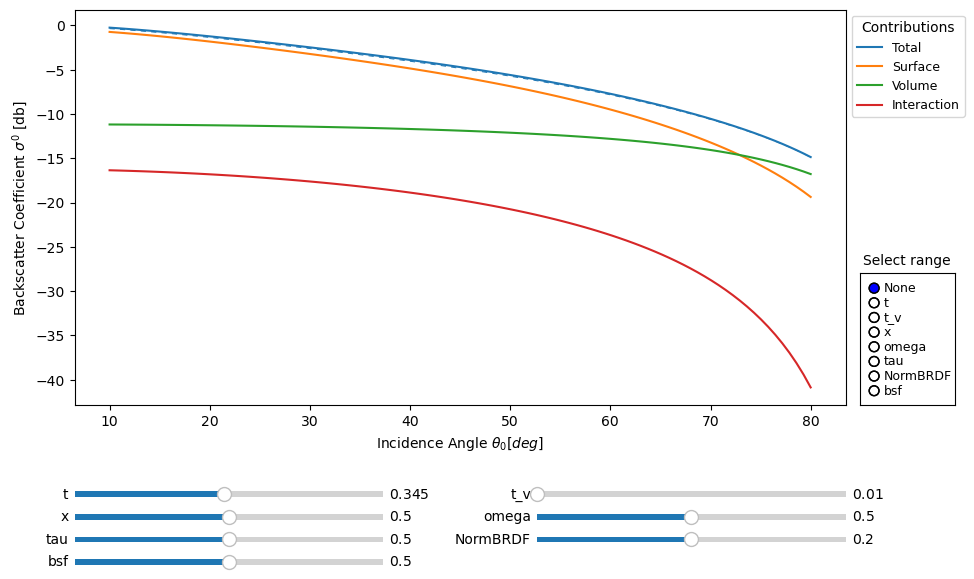

In [2]:
R.dB = True # Create monostatic plots in dB

# setup parameter ranges to analyze
param_dict=dict(t=(0.01, .7),
                t_v=(0.01, .7, 0.01),
                x=(0, 1),
                omega=(0,1),
                tau=(0,1),
                NormBRDF=(0, .4),
                bsf=(0, 1),
                )

a1 = R.analyze(param_dict=param_dict)

## Analyze 3D scattering distribution

17:38:15.027 WARNING: The analyze-plot shows results for 'vvvv' geometry!
17:38:15.218 DEBUG: Generation of fnevals functions...
17:38:15.218 DEBUG: Symengine set as backend.
17:38:15.219 INFO: Evaluating coefficients for interaction-term...
17:38:18.119 DEBUG: Expansion calculated, it took 2.8985703000000003 sec.
17:38:19.854 INFO: Coefficients extracted, it took 1.73506 sec.
D:\python_modules\RT1_new\src\rt1_model\_calc.py:1065: RuntimeWarning: divide by zero encountered in divide
  np.exp(-tau / mu) * np.log(mu / (1.0 - mu))
D:\python_modules\RT1_new\src\rt1_model\_calc.py:1065: RuntimeWarning: invalid value encountered in add
  np.exp(-tau / mu) * np.log(mu / (1.0 - mu))


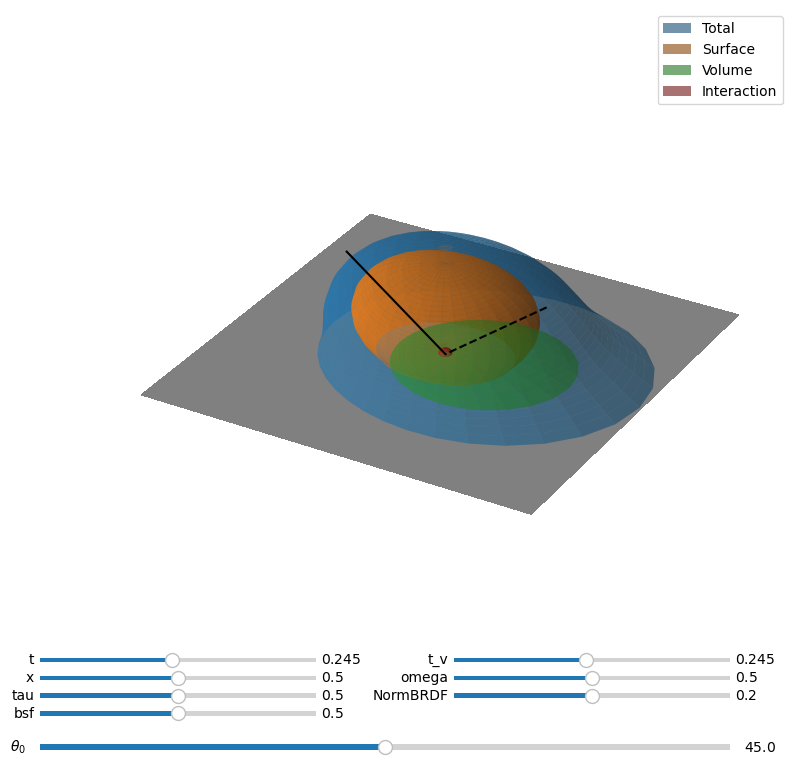

In [3]:
R.dB = False   # Create 3D plots in linear units

param_dict=dict(t=(0.01, 0.5),
                t_v=(0.01, 0.5),
                x=(0, 1),
                omega=(0, 1),
                tau=(0, 1),
                NormBRDF=(0, 0.4),
                bsf=(0, 1),
                )

a0 = R.analyze3d(param_dict=param_dict, contributions="tsvi")